In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
np.set_printoptions(suppress=True)

In [2]:
# construct a list 'classes' to store all classes
classes = ['aeroplane','bicycle','bird','boat','bottle','bus','car','cat','chair','cow',\
           'diningtable','dog','horse','motorbike','person','pottedplant','sheep','sofa','train','tvmonitor']
# load all data to an ndarray 'data'
dataset = ['data2012','data2007trainval','data2007test','trainval','trainval','test']
for i in range(int(len(dataset)/2)):
    datai = np.loadtxt('../'+dataset[i]+'/'+classes[0]+'_'+dataset[i+3]+'.txt')
    for classesi in classes[1:20]:
        temp = np.loadtxt('../'+dataset[i]+'/'+classesi+'_'+dataset[i+3]+'.txt')
        datai = np.concatenate((datai,temp),axis=1)
    if i==0:
        data = datai
    else:
        data = np.concatenate((data,datai),axis=0)

# delete the repeated columns in 'data'
didx = list(range(0,40,2))
data = np.delete(data,didx,axis=1)
# add indices to each image
idx = np.arange(data.shape[0]).reshape(data.shape[0],1) 
data = np.concatenate((idx,data),axis=1)
data.shape

(21503, 21)

In [3]:
11540+9963

21503

In [4]:
data[0:10]

array([[ 0., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1.,  1.],
       [ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1.,  1., -1., -1., -1.,  1., -1.],
       [ 2., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 3., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
         1., -1.,  1., -1., -1., -1., -1., -1.],
       [ 4., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 5., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 6., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1.,  1.],
       [ 7., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
        -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 8.,  1., -1., -

In [5]:
# import the name/index of each image
dataname = []
for i in range(int(len(dataset)/2)):
    with open('../'+dataset[i]+'/'+classes[0]+'_'+dataset[i+3]+'.txt', 'r') as file:
        datatemp = file.readlines()  
        for line in datatemp:
            linei = line.split()
            dataname.append(linei[0])
len(dataname)


21503

In [6]:
dataname[11540]

'000005'

In [7]:
# a dictionary for integer index and the real name
datadict = dict(zip(range(data.shape[0]),dataname))
datadict

{0: '2008_000002',
 1: '2008_000003',
 2: '2008_000007',
 3: '2008_000008',
 4: '2008_000009',
 5: '2008_000015',
 6: '2008_000016',
 7: '2008_000019',
 8: '2008_000021',
 9: '2008_000023',
 10: '2008_000026',
 11: '2008_000027',
 12: '2008_000028',
 13: '2008_000032',
 14: '2008_000033',
 15: '2008_000034',
 16: '2008_000036',
 17: '2008_000037',
 18: '2008_000041',
 19: '2008_000042',
 20: '2008_000043',
 21: '2008_000045',
 22: '2008_000050',
 23: '2008_000051',
 24: '2008_000052',
 25: '2008_000053',
 26: '2008_000054',
 27: '2008_000056',
 28: '2008_000059',
 29: '2008_000060',
 30: '2008_000062',
 31: '2008_000064',
 32: '2008_000066',
 33: '2008_000067',
 34: '2008_000070',
 35: '2008_000073',
 36: '2008_000074',
 37: '2008_000075',
 38: '2008_000076',
 39: '2008_000078',
 40: '2008_000080',
 41: '2008_000082',
 42: '2008_000084',
 43: '2008_000085',
 44: '2008_000089',
 45: '2008_000090',
 46: '2008_000093',
 47: '2008_000095',
 48: '2008_000096',
 49: '2008_000097',
 50: '2008

In [8]:
# compute the number of positive samples for each class
data[data==-1] = 0 
nclasses = np.sum(data,axis=0)
nclassdict = dict(zip(classes,nclasses[1:21]))
nclassdict

{'aeroplane': 1112.0,
 'bicycle': 1034.0,
 'bird': 1377.0,
 'boat': 861.0,
 'bottle': 1162.0,
 'bus': 781.0,
 'car': 2595.0,
 'cat': 1739.0,
 'chair': 1981.0,
 'cow': 571.0,
 'diningtable': 928.0,
 'dog': 2125.0,
 'horse': 1043.0,
 'motorbike': 993.0,
 'person': 8102.0,
 'pottedplant': 996.0,
 'sheep': 518.0,
 'sofa': 959.0,
 'train': 1064.0,
 'tvmonitor': 1060.0}

In [9]:
# reorder the dictionary according to the number of items
nclassdict0 = sorted(nclassdict.items(), reverse=True, key=lambda item:item[1])
nclassdict0
# type(nclassdict0)

[('person', 8102.0),
 ('car', 2595.0),
 ('dog', 2125.0),
 ('chair', 1981.0),
 ('cat', 1739.0),
 ('bird', 1377.0),
 ('bottle', 1162.0),
 ('aeroplane', 1112.0),
 ('train', 1064.0),
 ('tvmonitor', 1060.0),
 ('horse', 1043.0),
 ('bicycle', 1034.0),
 ('pottedplant', 996.0),
 ('motorbike', 993.0),
 ('sofa', 959.0),
 ('diningtable', 928.0),
 ('boat', 861.0),
 ('bus', 781.0),
 ('cow', 571.0),
 ('sheep', 518.0)]

In [10]:
classidx = []
coverage = 0
for value in nclassdict0:
    classidx.append(classes.index(value[0]))
    coverage += value[1]
print(classidx)
print(coverage)

[14, 6, 11, 8, 7, 2, 4, 0, 18, 19, 12, 1, 15, 13, 17, 10, 3, 5, 9, 16]
31001.0


In [11]:
data.shape

(21503, 21)

In [12]:
data_labels = data[:,1:]

In [13]:
reorder_data_labels = data_labels[:, classidx]

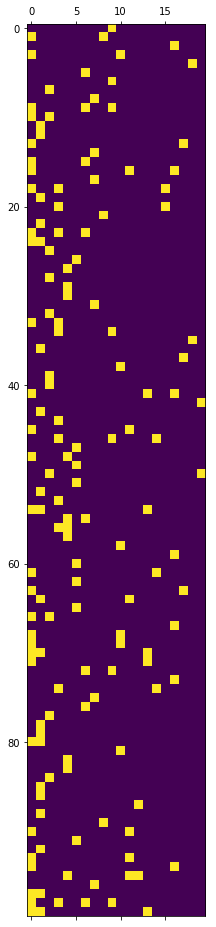

In [14]:
plt.matshow(reorder_data_labels[0:100])

In [15]:
sum(reorder_data_labels[:,0])

8102.0

In [16]:
reorder_data_labels.shape

(21503, 20)

In [17]:
weighted_reorder_data_labels = np.empty_like(reorder_data_labels)
for cls_idx in range(20):
    weighted_reorder_data_labels[:, cls_idx:cls_idx+1] = reorder_data_labels[:, cls_idx:cls_idx+1] * 2**cls_idx

In [18]:
weighted_reorder_data_labels[0:5]

array([[     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    512.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.],
       [     1.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,    256.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.],
       [     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  65536.,      0.,      0.,      0.],
       [     1.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,   1024.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.],
       [     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,    

In [19]:
sort_idx= np.argsort(weighted_reorder_data_labels.sum(axis=1)) # from small to large
sort_idx[0:10]

array([16572, 18005, 17995, 17994, 17990, 17987, 17985, 17984, 17982,
       17981])

In [20]:
reorder_data_labels[100]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [21]:
sort_reorder_data_labels = reorder_data_labels[sort_idx,:]

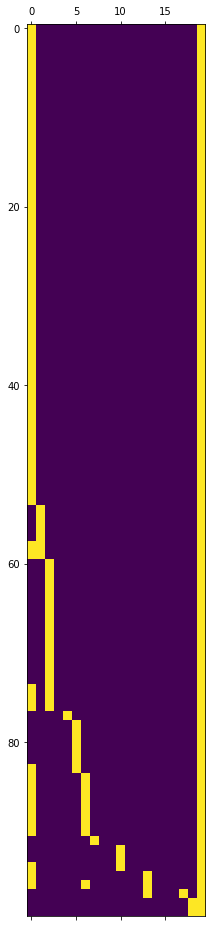

In [22]:
plt.matshow(sort_reorder_data_labels[-100:])

In [23]:
cv2.imwrite('sort_reorder_data_labels.png', sort_reorder_data_labels)

True

In [24]:
# count the number of images
num_img_i = np.array([])
for i in range(21):
    num_img_ii = np.array([np.argwhere(weighted_reorder_data_labels.sum(axis=1)<2**i).shape[0]])
    num_img_i = np.concatenate((num_img_i,num_img_ii))
num_img_dict = dict(zip(range(21),num_img_i))
num_img_dict

{0: 0.0,
 1: 2311.0,
 2: 4137.0,
 3: 5912.0,
 4: 6658.0,
 5: 8226.0,
 6: 9559.0,
 7: 10297.0,
 8: 11396.0,
 9: 12442.0,
 10: 13285.0,
 11: 14308.0,
 12: 15262.0,
 13: 15998.0,
 14: 16963.0,
 15: 17860.0,
 16: 18784.0,
 17: 19636.0,
 18: 20416.0,
 19: 20985.0,
 20: 21503.0}

The first 2311 images only contain 'person' (the first class), the first 4137 images only contain 'person' and 'dog' (the first 2 class), and so on. Iamges 20985-21503 must contain 'cow' (the last class) and may contain all other classes.

In [25]:
sort_reorder_data_labels[2310,:]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [26]:
sort_reorder_data_labels[2311,:]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [27]:
sort_reorder_data_labels[10297,:]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [28]:
' '.join(map(str, sort_reorder_data_labels.sum(axis=0).tolist()))

'8102.0 2595.0 2125.0 1981.0 1739.0 1377.0 1162.0 1112.0 1064.0 1060.0 1043.0 1034.0 996.0 993.0 959.0 928.0 861.0 781.0 571.0 518.0'

In [59]:
# segment the dataset into 3 subsets
seg = np.array([0,7,14,20])
num_seg = 3

n_data_in_task = [None]*num_seg
n_testdata_in_task = [None]*num_seg
testdata_idx_in_task = [None]*num_seg
traindata_idx_in_task = [None]*num_seg

print(n_data_in_task)
for i in range(num_seg):
    n_data_in_task[i] = int(num_img_dict[seg[i+1]])-int(num_img_dict[seg[i]])
    n_testdata_in_task[i] = int(n_data_in_task[i]/10)
    perm_tem = np.random.permutation(n_data_in_task[i])
    testdata_idx_in_task[i] = perm_tem[:n_testdata_in_task[i]]
    traindata_idx_in_task[i] = perm_tem[n_testdata_in_task[i]:]

[None, None, None]


In [60]:
print(n_data_in_task)
print(traindata_idx_in_task[0].shape)

[10297, 6666, 4540]
(9268,)


In [92]:
test_all = []
for i in range(1,num_seg+1):
    datalabeli = sort_reorder_data_labels[int(num_img_dict[seg[i-1]]):int(num_img_dict[seg[i]]),:]
    datalabel_train_i = datalabeli[traindata_idx_in_task[i-1]]
    datalabel_test_i = datalabeli[testdata_idx_in_task[i-1]]
    test_all.append(datalabel_test_i)
    print(datalabeli.sum(axis=0))
    print(datalabel_train_i.sum(axis=0))
    print(datalabel_test_i.sum(axis=0))
#     np.savetxt('datalabel'+str(i)+'_train.txt', datalabel_train_i, fmt='%d')
#     np.savetxt('datalabel'+str(i)+'_test.txt', datalabel_test_i, fmt='%d')

[4037. 1906. 1910.  872. 1591. 1336.  738.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
[3635. 1752. 1711.  792. 1428. 1202.  659.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
[402. 154. 199.  80. 163. 134.  79.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
[2571.  381.   87.  352.   89.   12.  143. 1101. 1058.  907. 1031.  996.
  751.  965.    0.    0.    0.    0.    0.    0.]
[2323.  352.   74.  324.   82.   12.  131.  986.  958.  832.  914.  886.
  671.  874.    0.    0.    0.    0.    0.    0.]
[248.  29.  13.  28.   7.   0.  12. 115. 100.  75. 117. 110.  80.  91.
   0.   0.   0.   0.   0.   0.]
[1494.  308.  128.  757.   59.   29.  281.   11.    6.  153.   12.   38.
  245.   28.  959.  928.  861.  781.  571.  518.]
[1341.  282.  115.  666.   56.   29.  247.   10.    5.  143.    9.   36.
  220.   27.  869.  817.  765.  704.  526.  473.]
[153.  26.  13.  91.   3.   0.  34.   1.   1.  10.   3. 

In [96]:
datalabel_test_all = np.concatenate(test_all)

In [102]:
datalabel_test_all.shape

(2149, 20)

In [101]:
print(datalabel_test_all.sum(axis=0))

[803. 209. 225. 199. 173. 134. 125. 116. 101.  85. 120. 112. 105.  92.
  90. 111.  96.  77.  45.  45.]


In [99]:
nlabels_test_all = datalabel_test_all.sum(axis=1)

In [62]:
def dname(dictx,idx):
    listx = []
    for item in idx:
        listx.append(dictx[item])
    return listx

In [63]:
for i in range(1,num_seg+1):
    with open('dataname'+str(i)+'_test.txt','w') as file:
        dataidxi = sort_idx[int(num_img_dict[seg[i-1]]):int(num_img_dict[seg[i]])]
        dataidx_test_i = dataidxi[testdata_idx_in_task[i-1]]
        dataname_test_i = dname(datadict, dataidx_test_i) # datadict: the diction of integer index and the real name
        for line in dataname_test_i:
            file.write(line+'\n')

In [64]:
for i in range(1,num_seg+1):
    with open('dataname'+str(i)+'_train.txt','w') as file:
        dataidxi = sort_idx[int(num_img_dict[seg[i-1]]):int(num_img_dict[seg[i]])]
        dataidx_train_i = dataidxi[traindata_idx_in_task[i-1]]
        dataname_train_i = dname(datadict, dataidx_train_i) # datadict: the diction of integer index and the real name
        for line in dataname_train_i:
            file.write(line+'\n')

output files:  
  datanamei: the real names of the ith part images  
  datalabeli: the corresponding labels of the ith part images

In [65]:
# compute the number of labels for each image
nlabels = np.sum(data[:,1:], axis=1)
nlabels.shape

(21503,)

In [69]:
# sort_idx[int(num_img_dict[seg[0]]):int(num_img_dict[seg[1]])]
nlabels1 = nlabels[sort_idx[int(num_img_dict[seg[0]]):int(num_img_dict[seg[1]])]]
nlabels1_train = nlabels[traindata_idx_in_task[0]]
nlabels1_test = nlabels[testdata_idx_in_task[0]]

nlabels2 = nlabels[sort_idx[int(num_img_dict[seg[1]]):int(num_img_dict[seg[2]])]]
nlabels2_train = nlabels[traindata_idx_in_task[1]]
nlabels2_test = nlabels[testdata_idx_in_task[1]]

nlabels3 = nlabels[sort_idx[int(num_img_dict[seg[2]]):int(num_img_dict[seg[3]])]]
nlabels3_train = nlabels[traindata_idx_in_task[2]]
nlabels3_test = nlabels[testdata_idx_in_task[2]]

nlabels3_test.shape

(454,)

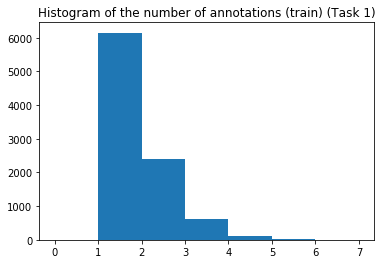

In [72]:
plt.hist(nlabels1_train, bins=[0,1,2,3,4,5,6,7])
plt.title("Histogram of the number of annotations (train) (Task 1)")
plt.savefig("hist_train1")
plt.show()

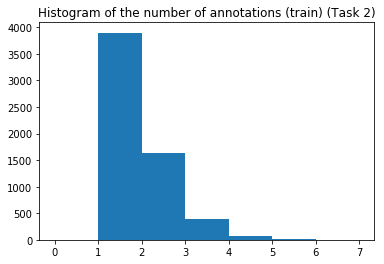

In [73]:
plt.hist(nlabels2_train, bins=[0,1,2,3,4,5,6,7])
plt.title("Histogram of the number of annotations (train) (Task 2)")
plt.savefig("hist_train2")
plt.show()

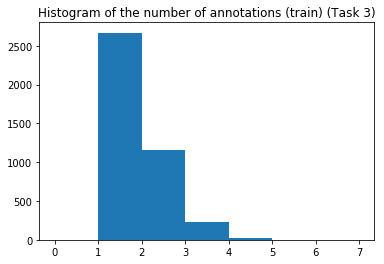

In [74]:
plt.hist(nlabels3_train, bins=[0,1,2,3,4,5,6,7])
plt.title("Histogram of the number of annotations (train) (Task 3)")
plt.savefig("hist_train3")
plt.show()

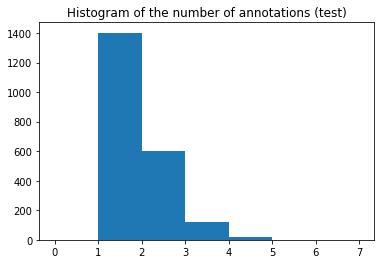

In [100]:
plt.hist(nlabels_test_all, bins=[0,1,2,3,4,5,6,7])
plt.title("Histogram of the number of annotations (test)")
plt.savefig("hist_test_all")
plt.show()

In [75]:
nlabels1_train[4000:4200]

array([1., 3., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       1., 1., 1., 2., 1., 3., 1., 1., 2., 1., 1., 2., 1., 3., 1., 2., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2.,
       3., 2., 1., 3., 1., 1., 3., 1., 3., 2., 2., 1., 1., 1., 5., 1., 1.,
       3., 1., 4., 2., 2., 3., 2., 2., 1., 2., 1., 3., 2., 2., 2., 2., 1.,
       1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1.,
       1., 3., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       3., 1., 1., 2., 1., 2., 2., 3., 1., 1., 1., 2., 2., 1., 1., 1., 2.,
       2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 2., 3., 2.,
       1., 1., 1., 2., 2., 2., 1., 3., 2., 2., 2., 2., 3., 2., 1., 2., 1.,
       1., 1., 4., 1., 1., 2., 2., 2., 1., 3., 2., 1., 1., 1., 1., 3., 1.,
       1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2.])

In [67]:
for i in range(1,num_seg+1):
    nlabelsi = nlabels[sort_idx[int(num_img_dict[seg[i-1]]):int(num_img_dict[seg[i]])]]
    print(nlabelsi.shape)
    np.savetxt('nlabels'+str(i)+'.txt', nlabelsi, fmt='%d')

(10297,)
(6666,)
(4540,)


In [81]:
for i in range(1,num_seg+1):
    with open('datanamelabel'+str(i)+'_train.txt','w') as file:
        
        dataidxi = sort_idx[int(num_img_dict[seg[i-1]]):int(num_img_dict[seg[i]])]
        dataidx_train_i = dataidxi[traindata_idx_in_task[i-1]]
        dataname_train_i = dname(datadict, dataidx_train_i) # datadict: the diction of integer index and the real name

        datalabeli = sort_reorder_data_labels[int(num_img_dict[seg[i-1]]):int(num_img_dict[seg[i]]),:]
        datalabel_train_i = datalabeli[traindata_idx_in_task[i-1]]
        
        datanamelabeli_train = [None]*datalabel_train_i.shape[0]
        for j in range(datalabel_train_i.shape[0]):
            datalabel_ij_str = ' '.join(map(str, np.int8(datalabel_train_i[j]).flatten().tolist()))
            datanamelabeli_train[j] = dataname_train_i[j] + '\t'+ datalabel_ij_str
            file.write(datanamelabeli_train[j]+'\n')

In [82]:
for i in range(1,num_seg+1):
    with open('datanamelabel'+str(i)+'_test.txt','w') as file:
        
        dataidxi = sort_idx[int(num_img_dict[seg[i-1]]):int(num_img_dict[seg[i]])]
        dataidx_test_i = dataidxi[testdata_idx_in_task[i-1]]
        dataname_test_i = dname(datadict, dataidx_test_i) # datadict: the diction of integer index and the real name

        datalabeli = sort_reorder_data_labels[int(num_img_dict[seg[i-1]]):int(num_img_dict[seg[i]]),:]
        datalabel_test_i = datalabeli[testdata_idx_in_task[i-1]]
        
        datanamelabeli_test = [None]*datalabel_test_i.shape[0]
        for j in range(datalabel_test_i.shape[0]):
            datalabel_ij_str = ' '.join(map(str, np.int8(datalabel_test_i[j]).flatten().tolist()))
            datanamelabeli_test[j] = dataname_test_i[j] + '\t'+ datalabel_ij_str
            file.write(datanamelabeli_test[j]+'\n')

### Test loading data from txt

In [83]:
with open('datanamelabel2_test.txt','r') as file:
    lines = file.readlines()

In [84]:
lines[-1].split()

['005368',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0']

In [85]:
images = [] 
labels = lines
for line in labels:
    items = line.split() 
    img_name = items.pop(0)
    items = np.array(items)
    images.append((img_name, tuple([int(v) for v in items])))

In [86]:
images[-1]

('005368', (1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0))

the data type of eachline in 'datanamelabeli.txt' is str. Equivalent to use 'datanamei.txt' + 'datalabel.txt'.